In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## generate testdata

In [75]:
train = pd.read_csv("./../../ordinal_regression/orca/datasets2/ordinal-regression/winequality-red/matlab/train_winequality-red.0", delimiter=" ", header = None)
test = pd.read_csv("./../../ordinal_regression/orca/datasets2/ordinal-regression/winequality-red/matlab/test_winequality-red.0", delimiter=" ", header = None)

newtest = pd.DataFrame(train.median()).T

new_row = pd.DataFrame(train.median()).T
new_row[2] = test.iloc[0,2]
newtest = newtest.append(new_row, ignore_index=True)

new_row = pd.DataFrame(train.median()).T
new_row[6] = test.iloc[0,6]
newtest = newtest.append(new_row, ignore_index=True)

new_row = pd.DataFrame(train.median()).T
new_row[2] = test.iloc[0,2]
new_row[6] = test.iloc[0,6]
newtest = newtest.append(new_row, ignore_index=True)

newtest = newtest.append(test.iloc[0,:], ignore_index=True)
newtest[11] = newtest[11].astype('int')


newtest.to_csv(f"./../../ordinal_regression/orca/test_winequality-red.0", sep=" ", header = False, index=False)
train.to_csv(f"./../../ordinal_regression/orca/train_winequality-red.0", sep=" ", header = False, index=False)

## predict by A-CLASS

In [2]:
f = pd.read_csv(f"./../tvaclm_exp/check_f/winequality-red0f.csv", header = None)
x = pd.read_csv(f"./../tvaclm_exp/check_f/winequality-red0x.csv", header = None)
x_sort_list = []
f_sort_list = []
for c in x.T.columns:
    tmp_xlist = []
    tmp_flist = []
    for i, xt in enumerate(x.T[c]):
        ft = f.T[c][i]
        if i==0:
            tmp_xlist.append(xt)
            tmp_flist.append(ft)
        else:
            if xt!=x.T[c][i-1]:
                tmp_xlist.append(xt)
                tmp_flist.append(ft)

    # plt.plot(tmp_xlist, tmp_flist)
    # plt.show()
    x_sort_list.append(tmp_xlist)
    f_sort_list.append(tmp_flist)

In [77]:
fval_list = []
for i in range(len(newtest)):
    fval = []
    row = newtest.iloc[i,:-1]
    for j,v in row.items():
        for k,x in enumerate(x_sort_list[j]):
            if v<=x:
                fval.append(f_sort_list[j][k])
                break
        if len(fval)==j:
            fval.append(f_sort_list[j][k])
    fval_list.append(fval)




In [82]:
fvaldf = pd.DataFrame(fval_list)
print(fvaldf.sum(axis=1))
fvaldf


0    0.339678
1    0.584429
2   -0.039544
3    0.205207
4   -0.989247
dtype: float64


,0,1,2,3,4,5,6,7,8,9,10
0,0.081550,0.068081,0.002707,0.027643,0.132162,0.037569,0.217487,-0.116370,-0.017369,0.006403,-0.100186
1,0.081550,0.068081,0.247459,0.027643,0.132162,0.037569,0.217487,-0.116370,-0.017369,0.006403,-0.100186
2,0.081550,0.068081,0.002707,0.027643,0.132162,0.037569,-0.161735,-0.116370,-0.017369,0.006403,-0.100186
3,0.081550,0.068081,0.247459,0.027643,0.132162,0.037569,-0.161735,-0.116370,-0.017369,0.006403,-0.100186
4,0.175533,-0.017198,0.247459,0.027643,0.132162,0.009652,-0.161735,-0.204639,0.253840,-0.632283,-0.819681


In [76]:
newtest

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.9,0.52,0.24,2.2,0.079,14.0,38.0,0.99665,3.31,0.62,10.1,4
1,7.9,0.52,0.66,2.2,0.079,14.0,38.0,0.99665,3.31,0.62,10.1,4
2,7.9,0.52,0.24,2.2,0.079,14.0,47.0,0.99665,3.31,0.62,10.1,4
3,7.9,0.52,0.66,2.2,0.079,14.0,47.0,0.99665,3.31,0.62,10.1,4
4,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,1


## wlb analysis

In [3]:
b = [-3.38694, -1.55337, -0.376246, 0.945657, 2.22958]

In [4]:
f = pd.read_csv(f"./../tvaclm_exp/check_f/wlb1f.csv", header = None)
x = pd.read_csv(f"./../tvaclm_exp/check_f/wlb1x.csv", header = None)
x_sort_list = []
f_sort_list = []
for c in x.T.columns:
    tmp_xlist = []
    tmp_flist = []
    for i, xt in enumerate(x.T[c]):
        ft = f.T[c][i]
        if i==0:
            tmp_xlist.append(xt)
            tmp_flist.append(ft)
        else:
            if xt!=x.T[c][i-1]:
                tmp_xlist.append(xt)
                tmp_flist.append(ft)

    # plt.plot(tmp_xlist, tmp_flist)
    # plt.show()
    x_sort_list.append(tmp_xlist)
    f_sort_list.append(tmp_flist)

In [5]:
columns = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
       'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'STRESS']

0.2416721 CORE_CIRCLE 2
0.2649876 SOCIAL_NETWORK 4
0.297141 FLOW 9
0.266358 LIVE_VISION 11
0.464372 SLEEP_HOURS 12
0.650133 LOST_VACATION 13
1.5366110000000002 DAILY_SHOUTING 14
0.3272284 SUFFICIENT_INCOME 15
0.40083799999999997 TIME_FOR_PASSION 17
0.607227 WEEKLY_MEDITATION 18
0.38419099999999995 GENDER 20


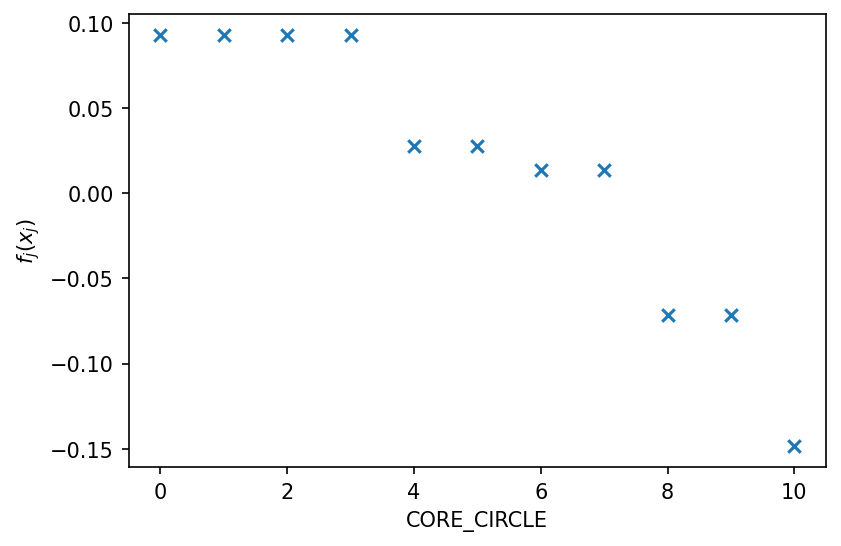

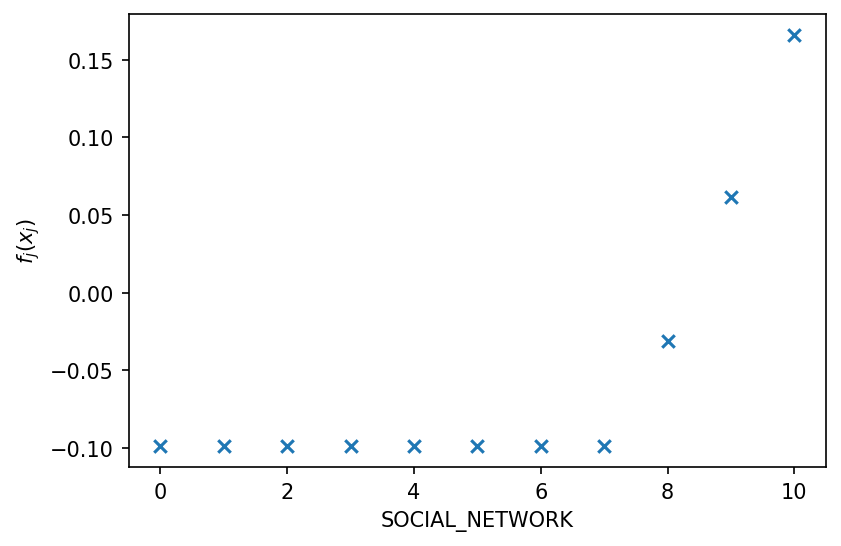

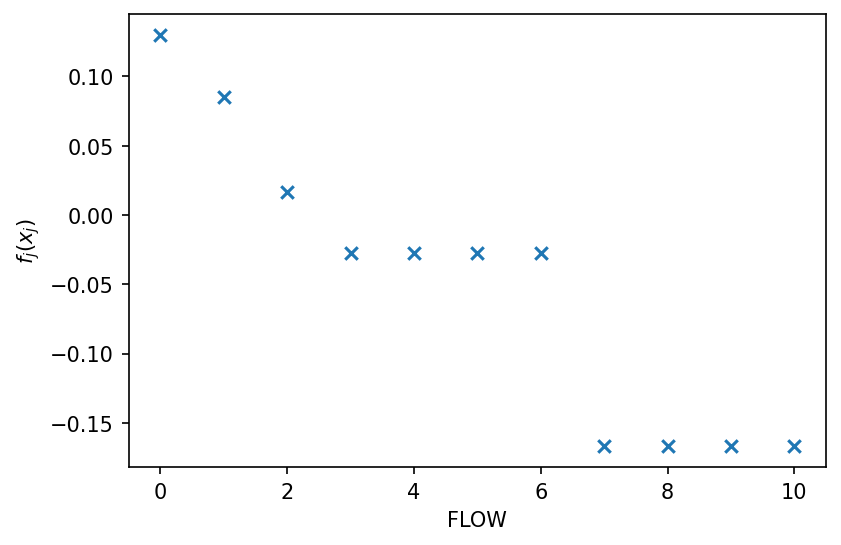

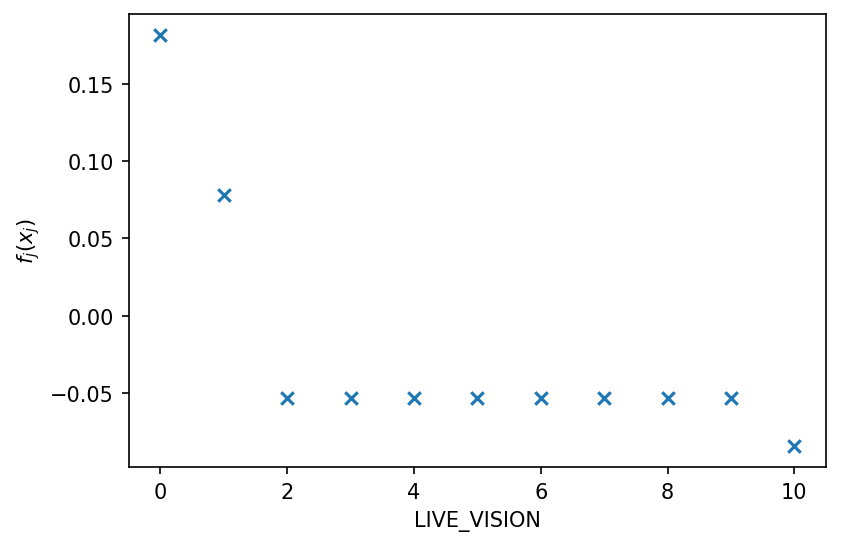

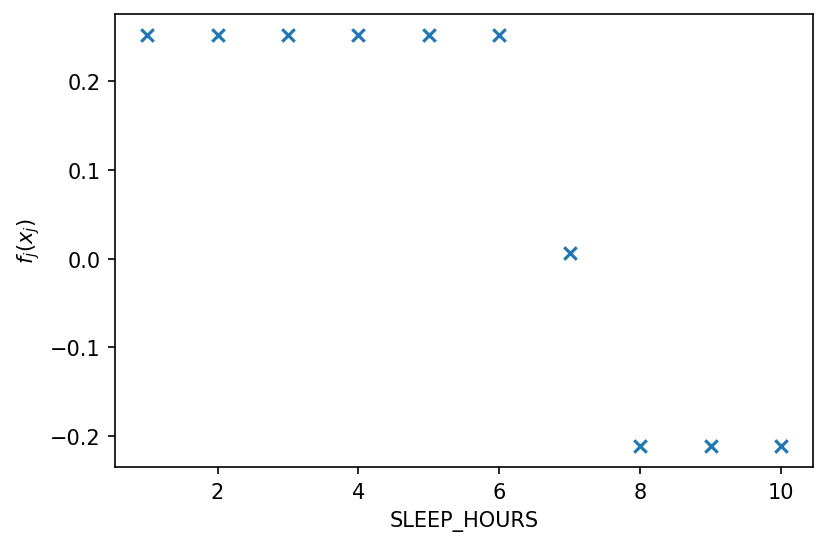

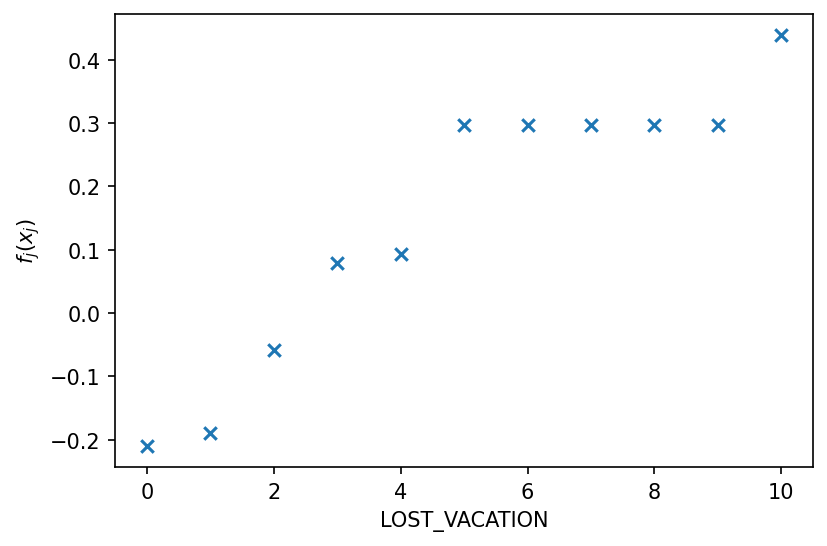

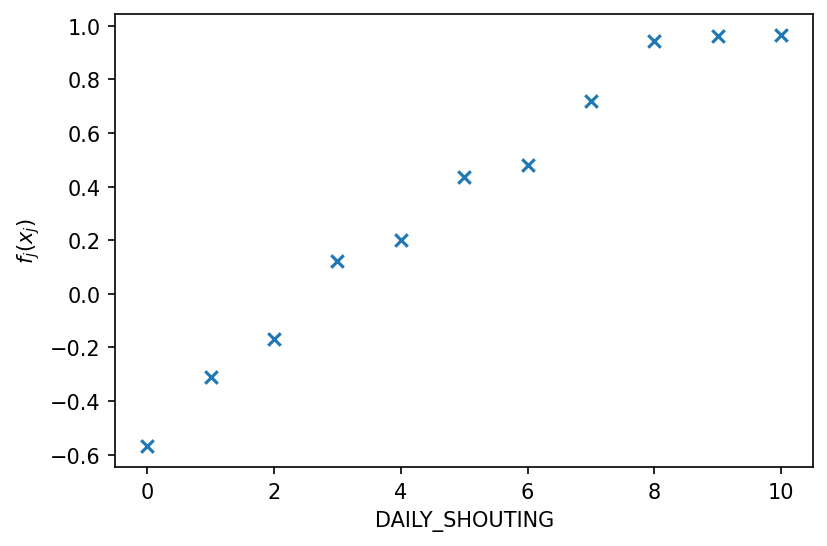

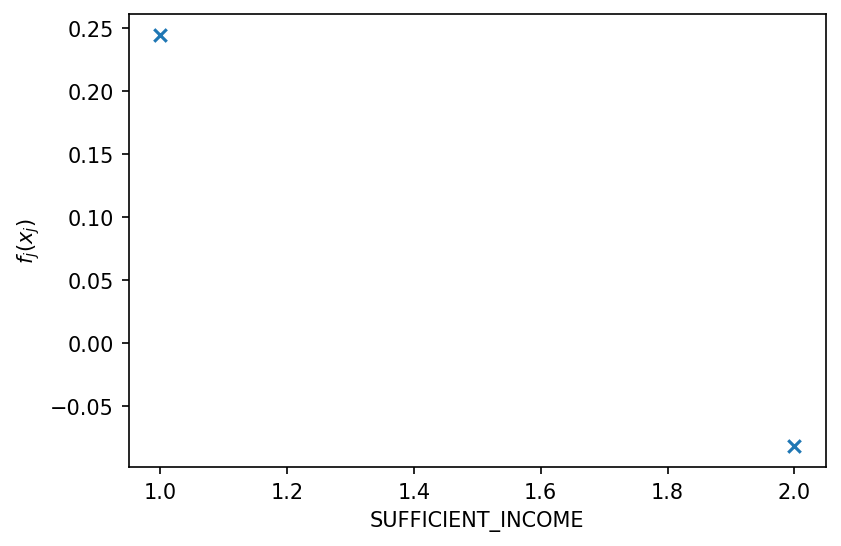

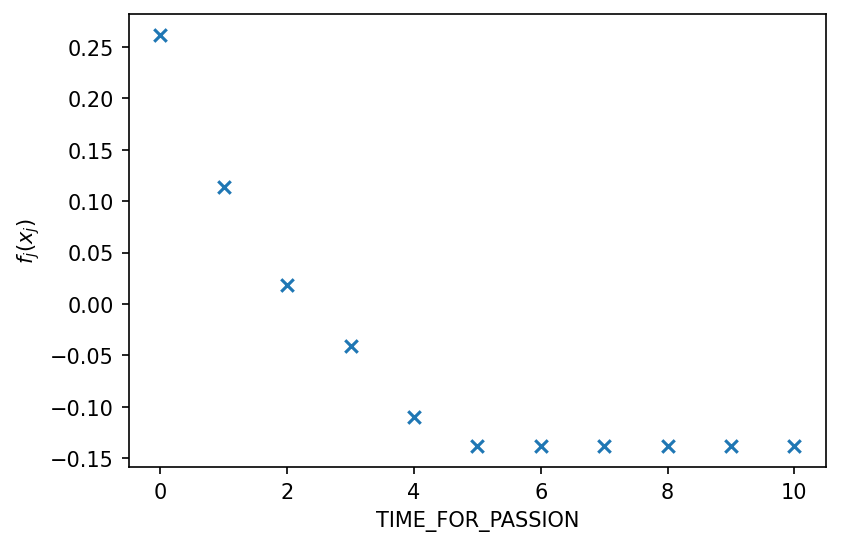

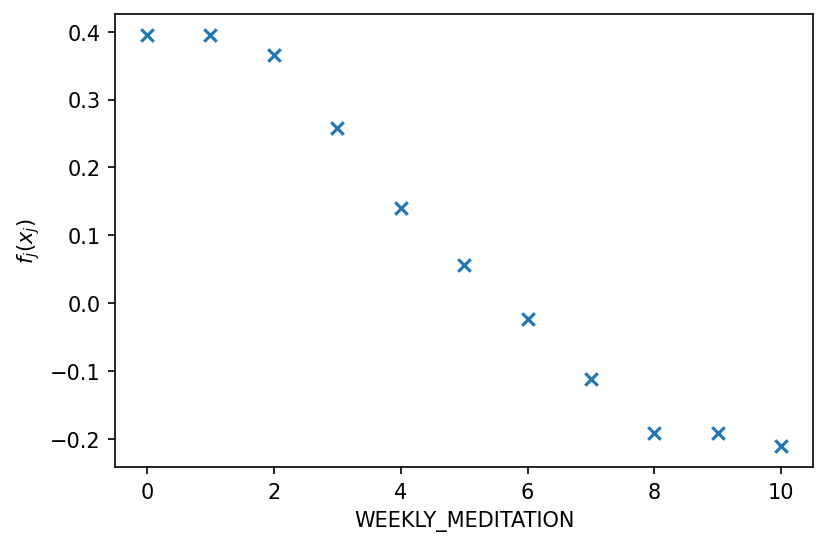

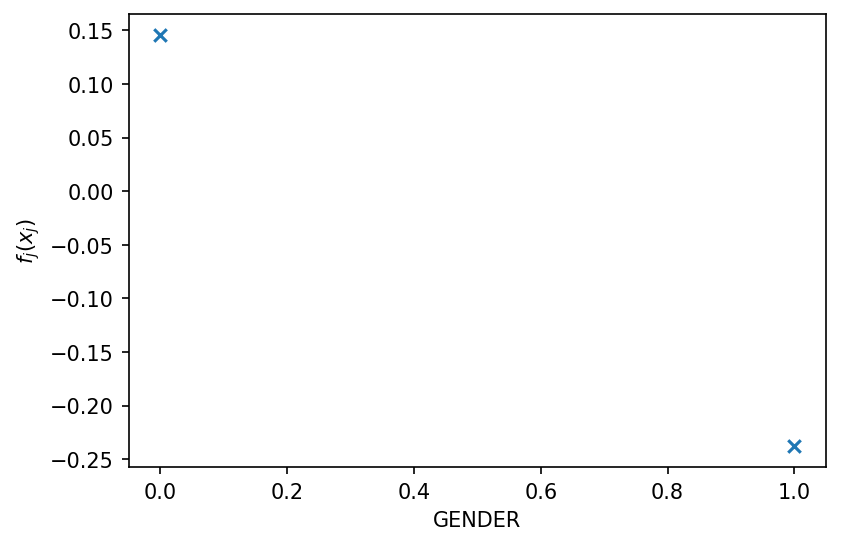

In [106]:
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)

for i,fval in enumerate(f_sort_list):
    if max(fval)-min(fval) > 0.2:

        fig = plt.figure(figsize=(6, 4), dpi=150, facecolor="white")
        print(max(fval)-min(fval), columns[i], i)
        pd.DataFrame([x_sort_list[i], fval]).to_csv(f'./result_files/interpret/{columns[i]}.csv')
        plt.scatter(x_sort_list[i], fval,marker="x")
        # plt.plot(x_sort_list[i], fval, ls = "dotted")
        plt.xlabel(columns[i])
        plt.ylabel(rf"$f_j(x_j)$")
        plt.savefig(f"./figs/interpret/{columns[i]}.pdf")
        fig.show()

In [12]:
test = pd.read_csv("./../../ordinal_regression/orca/datasets2/bigdata/wlb/matlab/test_wlb.1", delimiter=" ", header = None)

In [22]:
train.iloc[:,17].value_counts()

1     3172
2     2693
3     1904
0     1739
4     1456
5     1181
6      966
8      873
10     654
7      614
9      186
Name: 17, dtype: int64

In [98]:
sample1 = test.iloc[6,:-1]
sample2 = test.iloc[36,:-1]
print(test.iloc[6,-1], test.iloc[24,-1])

2 6


In [99]:
flist1 = []
flist2 = []
for i,x in enumerate(zip(sample1,sample2)):
    x1,x2=x
    dif = f_sort_list[i][x_sort_list[i].index(x1)] - f_sort_list[i][x_sort_list[i].index(x2)]
    if abs(dif)>0.2:
        print(columns[i],i, x1,x2, dif)
    flist1.append(f_sort_list[i][x_sort_list[i].index(x1)])
    flist2.append(f_sort_list[i][x_sort_list[i].index(x2)])

CORE_CIRCLE 2 10 2 -0.2416721
LIVE_VISION 11 4 0 -0.2352404
SLEEP_HOURS 12 9 7 -0.21854123
DAILY_SHOUTING 14 1 10 -1.276075
SUFFICIENT_INCOME 15 2 1 -0.3272284


In [100]:
sum(flist1)

-0.4700739250000001

In [74]:
sum(flist2)

2.162400605

In [97]:
test[test[21]==2]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
2,3,3,5,2,10,4,2,1,5,4,...,8,0,1,2,10,4,1,2,0,2
6,3,7,10,10,10,10,2,2,8,10,...,9,10,1,2,10,5,10,3,0,2
10,5,2,3,0,5,1,2,1,9,5,...,8,10,5,2,4,3,3,3,0,2
18,3,10,8,3,6,5,1,1,9,7,...,8,0,0,2,2,10,6,1,1,2
31,5,4,10,5,10,0,0,1,9,3,...,8,0,2,2,0,1,7,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,3,10,8,4,1,3,2,1,3,3,...,8,10,1,2,10,3,7,3,0,2
479,3,0,7,4,10,2,3,2,3,8,...,6,8,0,2,5,2,7,3,1,2
506,4,10,6,4,2,1,5,1,7,7,...,5,0,3,2,8,3,10,3,0,2
511,4,9,6,3,10,6,2,1,6,6,...,7,8,2,2,8,2,7,0,0,2


In [101]:
com = test.iloc[[6,36],:]

In [102]:
com.columns=columns
com = com.T
com['f1'] = flist1+[0]
com['f2'] = flist2+[0]
com['dif'] = np.array(flist2+[0]) - np.array(flist1+[0])

In [103]:
print(com.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrrr}
\toprule
{} &   6 &  36 &     f1 &     f2 &    dif \\
\midrule
FRUITS\_VEGGIES    &   3 &   5 &  0.025 &  0.025 &  0.000 \\
PLACES\_VISITED    &   7 &   6 & -0.024 & -0.024 &  0.000 \\
CORE\_CIRCLE       &  10 &   2 & -0.149 &  0.093 &  0.242 \\
SUPPORTING\_OTHERS &  10 &  10 &  0.058 &  0.058 &  0.000 \\
SOCIAL\_NETWORK    &  10 &  10 &  0.166 &  0.166 &  0.000 \\
ACHIEVEMENT       &  10 &   7 & -0.033 & -0.033 &  0.000 \\
DONATION          &   2 &   5 &  0.002 &  0.002 &  0.000 \\
BMI\_RANGE         &   2 &   1 &  0.054 & -0.039 & -0.093 \\
TODO\_COMPLETED    &   8 &   5 & -0.067 &  0.033 &  0.099 \\
FLOW              &  10 &   4 & -0.167 & -0.027 &  0.140 \\
DAILY\_STEPS       &   5 &   5 &  0.001 &  0.001 &  0.000 \\
LIVE\_VISION       &   4 &   0 & -0.054 &  0.182 &  0.235 \\
SLEEP\_HOURS       &   9 &   7 & -0.212 &  0.007 &  0.219 \\
LOST\_VACATION     &  10 &  10 &  0.439 &  0.439 &  0.000 \\
DAILY\_SHOUTING    &   1 &  10 & -0.309 &  0.967 &  1.276 \\
S

In [104]:
com.sum()

6      133.000000
36     121.000000
f1      -0.470074
f2       2.162401
dif      2.632475
dtype: float64

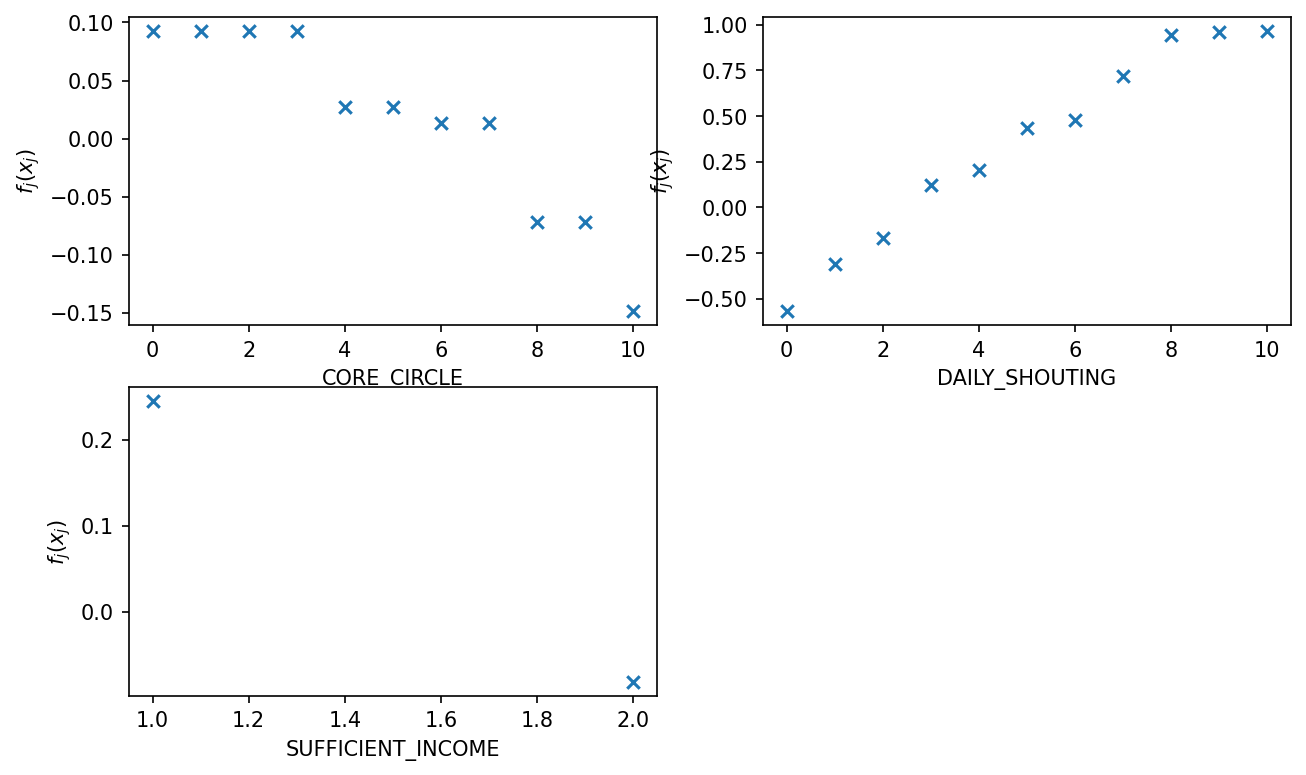

In [113]:
fig = plt.figure(figsize=(10, 6), dpi=150, facecolor="white")
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
axdict = {0: ax1, 1: ax2, 2:ax3}
for id,i in enumerate([2,14,15]):
    ax = axdict[id]
    ax.scatter(x_sort_list[i], f_sort_list[i],marker="x")
    # plt.plot(x_sort_list[i], fval, ls = "dotted")
    ax.set_xlabel(columns[i])
    ax.set_ylabel(rf"$f_j(x_j)$")

fig.savefig(f"./figs/interpret.pdf")